In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

d:\1903\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\1903\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\1903\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\1903\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:461: FutureWarning: Passing (type, 1) or '1type' as a synonym of type

In [3]:
# 实现算法的三部曲
# 1, 找到算法的预测函数,  y = wx + b
# 2, 找到损失函数: 表示真实值和预测值之间的差距. 最小二乘法
# 3, 求损失函数最小的时候的系数. 梯度下降法.

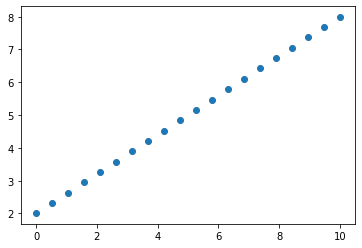

In [4]:
X = np.linspace(0, 10, 20)
y = np.linspace(2,8, 20)
plt.scatter(X,y)

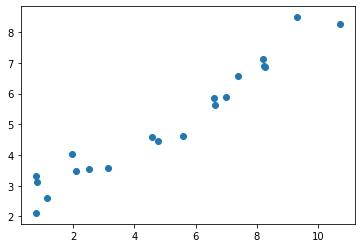

In [5]:
# 加点噪声
X += np.random.randn(20)*0.5
y += np.random.randn(20)*0.5
plt.scatter(X,y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
linear  = LinearRegression()
linear.fit(X.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
w = linear.coef_[0]
b = linear.intercept_
display(w,b)

0.5740612844043927

2.1634196539126176

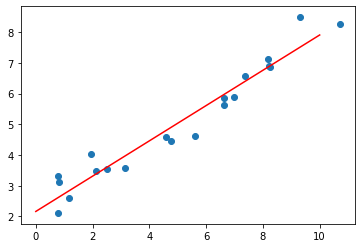

In [9]:
plt.scatter(X,y)
x = np.linspace(0,10,100).reshape(-1,1)
# plt.plot(x, w*x+b, c='r')
y_  = linear.predict(x)
plt.plot(x, y_, c='r')

In [15]:
# 定义预测函数
# y = wx + b
# 把x,y定义为占位符
x = tf.placeholder(dtype=tf.float64)
Y = tf.placeholder(dtype=tf.float64)

# 把w和b定义为变量
W = tf.Variable(initial_value=np.random.rand(1), dtype=tf.float64)
B = tf.Variable(initial_value=0, dtype=tf.float64)
# 预测函数
Y_pred = tf.add(tf.multiply(W, x), B) # y = wx + b


# 定义损失函数 一般会除以样本个数,变成平均误差
cost = tf.reduce_sum(tf.pow(tf.subtract(Y, Y_pred), 2)) / 20

# 求损失函数最小的时候的系数
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005).minimize(cost)

# 初始化
init = tf.global_variables_initializer()

In [11]:
a = tf.constant(np.array([[1,2,3],[2,3,4]]))
b = tf.reduce_sum(a, axis=1)
with tf.Session() as sess:
    print(sess.run(b))

[6 9]


In [16]:
with tf.Session() as sess:
    sess.run(init)
    # 循环的传入训练数据
    # epoch
    for i in range(10000):
        for X_train, y_train in zip(X,y):
            sess.run(optimizer, feed_dict={x: X_train, Y:y_train})
            
        # 打印中间过程
        # 每100次打印一次结果
        if i % 100 ==  0:
            # 求w,b,和损失
            coef = sess.run(W)
            intercept = sess.run(B)
            loss = sess.run(cost, feed_dict={x:X, Y:y})
            print(f'第{i}次训练, W:{coef}, B:{intercept}, 损失:{loss}')
            
    # 全部训练完之后打印最终结果
    coef = sess.run(W)
    intercept = sess.run(B)
    loss = sess.run(cost, feed_dict={x:X, Y:y})
    print(f'最终结果: W:{coef}, B:{intercept}, 损失:{loss}')

第0次训练, W:[0.35686872], B:0.038769151150679464, 损失:10.994259105256265
第100次训练, W:[0.79564489], B:0.5999414520843005, 损失:0.8678180014651155
第200次训练, W:[0.74400291], B:0.9698637327905304, 损失:0.5860597950693563
第300次训练, W:[0.70462475], B:1.2519377114409285, 损失:0.42208895281531655
第400次训练, W:[0.67459802], B:1.4670254030494667, 损失:0.3266389242288732
第500次训练, W:[0.65170198], B:1.6310345587427162, 损失:0.2710559617680891
第600次训练, W:[0.63424323], B:1.756095193082359, 损失:0.23867337634307767
第700次训练, W:[0.62093055], B:1.8514567123544048, 损失:0.21979572047507606
第800次训练, W:[0.61077933], B:1.924171994872291, 损失:0.20878203830537698
第900次训练, W:[0.60303881], B:1.9796190174451087, 损失:0.20234968116736712
第1000次训练, W:[0.59713648], B:2.0218986071783203, 损失:0.19858787287062887
第1100次训练, W:[0.59263583], B:2.0541377360812523, 损失:0.19638400066503625
第1200次训练, W:[0.58920398], B:2.0787207899608746, 损失:0.19508991861291464
第1300次训练, W:[0.58658711], B:2.0974659161045635, 损失:0.194327832116661
第1400次训练, W:[0.5845917], 

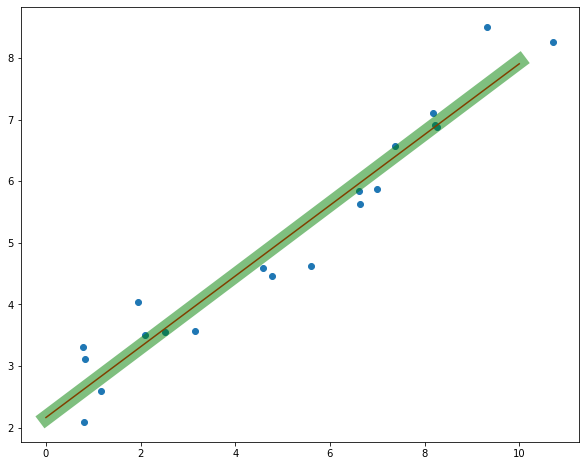

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
x = np.linspace(0,10,100).reshape(-1,1)
# plt.plot(x, w*x+b, c='r')
y_  = linear.predict(x)
plt.plot(x, y_, c='r')

plt.plot(x, 0.57818458 * x + 2.1576550397144225, lw=15, alpha=0.5, c='g')